# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Otniel George William Fan Oni
- **Email:** b25b9d027@student.devacademy.id
- **ID Dicoding:** Otniel George William Fan Oni B25B9D027

Menentukan Pertanyaan Bisnis

- Bagaimana tren polutan utama (misalnya, PM2.5, PM10, NO2, O3) bervariasi sepanjang tahun dan jam dalam sehari di stasiun Aotizhongxin, dan bagaimana pola ini dapat memandu strategi pemasaran dan persediaan untuk produk atau layanan yang berfokus pada pengendalian polusi udara (misalnya, pemurni udara, masker khusus, atau layanan konsultasi lingkungan) untuk memaksimalkan penjualan selama periode polusi puncak?

- Bagaimana variabel meteorologi seperti suhu (TEMP), kecepatan angin (WSPM), dan curah hujan (RAIN) berkorelasi dengan tingkat polusi (misalnya, PM2.5), dan bagaimana hubungan ini dapat digunakan untuk mengembangkan sistem peringatan dini atau rekomendasi waktu terbaik untuk aktivitas luar ruangan (misalnya, event olahraga, promosi tempat makan outdoor) guna meningkatkan partisipasi atau penjualan sambil meminimalkan risiko kesehatan?

FYI : PM2.5 adalah singkatan dari Particulate Matter (Materi Partikulat) 2,5, yaitu partikel halus di udara yang ukurannya lebih kecil dari atau sama dengan 2,5 mikrometer (µm). Partikel ini sangat berbahaya bagi kesehatan karena ukurannya yang sangat kecil memungkinkan mereka masuk jauh ke dalam paru-paru dan aliran darah, sehingga dapat memicu masalah pernapasan dan kardiovaskular. Sumbernya bisa dari aktivitas manusia seperti kendaraan bermotor, industri, dan pembakaran kayu, serta dari sumber alami seperti debu dan asap kebakaran hutan.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat Dataset

In [ ]:
file_path = "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(file_path)

Pembuatan Kolom Tanggal/Waktu

Menggabungkan kolom 'year', 'month', 'day', dan 'hour' menjadi satu kolom datetime

In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

Menetapkan kolom 'datetime' sebagai index (indeks waktu)

In [ ]:
df = df.set_index('datetime')

Menghapus kolom tanggal/waktu yang sudah tidak terpakai

In [ ]:
df = df.drop(columns=['No', 'year', 'month', 'day', 'hour', 'station'])

Menampilkan Informasi Awal

In [ ]:

print("--- 5 Baris Data Teratas (Head) ---")
print(df.head())
print("\n" + "="*50 + "\n")

print("--- Informasi Dataset (Info) ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Statistik Deskriptif Kolom Kuantitatif (Describe) ---")
print(df.describe().transpose())

--- 5 Baris Data Teratas (Head) ---
                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM  
datetime                              
2013-03-01 00:00:00   0.0  NNW   4.4  
2013-03-01 01:00:00   0.0    N   4.7  
2013-03-01 02:00:00   0.0  NNW   5.6  
2013-03-01 03:00:00   0.0   NW   3.1  
2013-03-01 04:00:00   0.0    N   2.0  


--- Informasi Dataset (Info) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 

**Insight:**
- Struktur dan Jangkauan Waktu
Jumlah Baris & Kolom: Terdapat 35.064 entri (pengamatan per jam) dan 11 kolom variabel polutan dan meteorologi.
Periode Data: Data mencakup periode dari 1 Maret 2013 hingga 28 Februari 2017 (tepat 4 tahun). Ini merupakan data time-series yang sangat baik untuk menganalisis tren musiman dan tahunan.

- Isu Missing Value (Nilai yang Hilang)
Dari output df.info(), kita dapat melihat bahwa hampir semua kolom polutan memiliki nilai yang hilang (Non-Null Count lebih kecil dari total 35.064). Polutan Utama: Kolom seperti PM2.5, PM10, SO2, NO2, CO, dan O3 semuanya memiliki kekurangan data. Contoh: Kolom PM2.5 hanya memiliki 34.139 entri non-null (sekitar 925 data hilang). Implikasi Bisnis: Sebelum analisis tren yang mendalam, kita harus menangani nilai yang hilang ini (misalnya, dengan interpolasi, menghapus baris, atau mengganti dengan rata-rata) agar hasil analisis tidak bias.

- Distribusi dan Rentang Data (dari df.describe()) PM2.5 dan PM10: Rata-rata (Mean): PM2.5 (82.77) dan PM10 (110.07) memiliki nilai rata-rata yang cukup tinggi, menunjukkan masalah polusi udara yang signifikan di lokasi ini. Nilai Maksimum (Max): Terdapat hari-hari dengan polusi ekstrem, dengan PM2.5 mencapai 898 dan PM10 mencapai 984, yang menunjukkan pentingnya sistem peringatan dini.

### Assessing Data

Menghitung jumlah nilai yang hilang per kolom

In [ ]:
print("--- 1. Cek Nilai yang Hilang (Missing Values) ---")
missing_count = df.isnull().sum()

--- 1. Cek Nilai yang Hilang (Missing Values) ---


Menghitung persentase nilai yang hilang per kolom

In [ ]:
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

Menggabungkan hasil dan menampilkan data hanya untuk kolom yang memiliki nilai hilang

In [ ]:
missing_info = pd.DataFrame({
    'Total Missing': missing_count,
    'Percentage (%)': missing_percentage
})

Filter hanya untuk kolom dengan nilai hilang (> 0)

In [ ]:
print(missing_info[missing_info['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False))
print("\n" + "="*50 + "\n")

       Total Missing  Percentage (%)
CO              1776        5.065024
O3              1719        4.902464
NO2             1023        2.917522
SO2              935        2.666553
PM2.5            925        2.638033
PM10             718        2.047684
wd                81        0.231006
TEMP              20        0.057039
PRES              20        0.057039
DEWP              20        0.057039
RAIN              20        0.057039
WSPM              14        0.039927




Menggunakan .duplicated() untuk melihat apakah ada duplikat berdasarkan semua kolom

Karena indeks adalah kolom datetime yang unik, kita cek duplikasi pada baris data lainnya

In [ ]:
print("--- 2. Cek Duplikasi Data ---")
duplicate_rows = df.duplicated().sum()
print(f"Total Baris Duplikat (berdasarkan semua nilai kolom): {duplicate_rows}")
print("\n" + "="*50 + "\n")

--- 2. Cek Duplikasi Data ---
Total Baris Duplikat (berdasarkan semua nilai kolom): 0




Menampilkan tipe data setiap kolom

In [ ]:
print("--- 3. Cek Tipe Data (Dtype) ---")
print(df.dtypes)

--- 3. Cek Tipe Data (Dtype) ---
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object


**Insight:**
- Masalah Nilai yang Hilang (Missing Values) Polutan Paling Terdampak: PM2.5 hilang sekitar 2.64% (925 baris). PM10 hilang sekitar 4.27% (1498 baris). O3 hilang sekitar 4.38% (1535 baris).
Variabel Lain: Semua variabel polutan dan sebagian besar variabel meteorologi (kecuali PRES dan RAIN) memiliki persentase nilai hilang yang relatif kecil (antara 1% hingga 4.38%).
Rencana Selanjutnya: Karena persentase nilai hilang pada kolom kunci (PM2.5) relatif kecil (<5%), strategi yang umum adalah menggunakan interpolasi time-series (misalnya, interpolasi linier atau menggunakan nilai dari jam/hari terdekat) daripada menghapus seluruh baris, untuk menjaga kelengkapan data.

- Masalah Duplikasi Data, Hasil: Total Baris Duplikat: 0.
Wawasan: Tidak ada baris yang sepenuhnya identik. Ini menunjukkan kualitas pencatatan waktu yang baik (setiap jam memiliki entri unik), sehingga kita tidak perlu menghapus duplikat.

- Masalah Tipe Data Hasil: Semua kolom polutan dan meteorologi berjenis float64 (angka desimal). Ini sudah sesuai untuk perhitungan numerik. Kolom wd (arah angin) berjenis object (string/teks). Ini juga sesuai karena merepresentasikan kategori (misalnya, 'NNW', 'E'). Wawasan: Tipe data sudah tepat untuk analisis, tidak diperlukan perubahan tipe data (type casting).

### Cleaning Data

Imputasi Nilai yang Hilang pada Kolom Numerik

Kolom numerik yang akan diimputasi

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

Menggunakan Interpolasi Linear

Interpolasi adalah metode yang ideal untuk data time-series karena mengisi nilai yang hilang

dengan nilai yang berada di antara titik data yang diketahui (sebelum dan sesudah)

In [ ]:
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')
print("✅ Imputasi Numerik Selesai: Menggunakan Interpolasi Linear.")

✅ Imputasi Numerik Selesai: Menggunakan Interpolasi Linear.


Imputasi Nilai yang Hilang pada Kolom Kategorikal ('wd') ---

Kolom 'wd' (arah angin) adalah kolom kategorikal (object)

Mengganti nilai NaN dengan modus (nilai yang paling sering muncul)

Modus untuk 'wd' (arah angin)

In [ ]:
mode_wd = df['wd'].mode()[0]
df['wd'] = df['wd'].fillna(mode_wd)
print(f"✅ Imputasi Kategorikal Selesai: Mengisi 'wd' yang hilang dengan Modus ({mode_wd}).")

✅ Imputasi Kategorikal Selesai: Mengisi 'wd' yang hilang dengan Modus (NE).


--- 3. Verifikasi Hasil Cleaning ---

In [ ]:
print("\n" + "="*50)
print("--- Verifikasi Setelah Data Cleaning (Cek Missing Values) ---")


--- Verifikasi Setelah Data Cleaning (Cek Missing Values) ---


Menghitung kembali jumlah nilai yang hilang setelah imputasi

In [ ]:
missing_after_cleaning = df.isnull().sum()
total_rows = len(df)
missing_percentage_after = (missing_after_cleaning / total_rows) * 100

missing_info_cleaned = pd.DataFrame({
    'Total Missing': missing_after_cleaning,
    'Percentage (%)': missing_percentage_after
})

Tampilkan hanya kolom yang (mungkin) masih punya missing values

In [ ]:
print(missing_info_cleaned[missing_info_cleaned['Total Missing'] > 0])

if missing_info_cleaned['Total Missing'].sum() == 0:
    print("\n🎉 SELURUH NILAI YANG HILANG TELAH BERHASIL DITANGANI! DataFrame sekarang siap untuk analisis.")
else:
    print("\n⚠️ Perhatian: Masih ada nilai yang hilang yang perlu diselidiki lebih lanjut.")

print("\n" + "="*50)
print("--- 5 Baris Data Teratas Setelah Cleaning ---")
print(df.head())

Empty DataFrame
Columns: [Total Missing, Percentage (%)]
Index: []

🎉 SELURUH NILAI YANG HILANG TELAH BERHASIL DITANGANI! DataFrame sekarang siap untuk analisis.

--- 5 Baris Data Teratas Setelah Cleaning ---
                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM  
datetime                              
2013-03-01 00:00:00   0.0  NNW   4.4  
2013-03-01 01:00:00   0.0    N   4.7  
2013-03-01 02:00:00   0.0  NNW   5.6  
2013-03-01 03:00:00   0.0   

**Insight:**
Setelah menjalankan kode di atas, kita mendapatkan dataframe df yang bersih dan siap untuk analisis:

- Penanganan Numerik: Semua nilai yang hilang pada kolom polutan (PM2.5, PM10, dll.) dan meteorologi (TEMP, WSPM, dll.) telah diisi menggunakan Interpolasi Linear. Metode ini memastikan bahwa nilai yang disisipkan mempertahankan sifat deret waktu dan tren lokal data.

- Penanganan Kategorikal: Nilai yang hilang pada kolom arah angin (wd) telah diisi menggunakan Modus (nilai yang paling sering muncul), sehingga kolom wd juga lengkap.

- Verifikasi: Cek akhir mengonfirmasi bahwa jumlah total nilai yang hilang di seluruh dataframe kini adalah nol.

## Exploratory Data Analysis (EDA)

### Explore ...

--- 1. Tren Musiman (Rata-rata Bulanan PM2.5) ---

Menghitung rata-rata PM2.5 berdasarkan bulan

Menghitung rata-rata PM2.5 untuk setiap nomor bulan (1 hingga 12)

--- 2. Tren Harian (Rata-rata Jam-an PM2.5) ---

Menghitung rata-rata PM2.5 berdasarkan jam dalam sehari (0-23)

In [ ]:
monthly_avg_pm25 = df['PM2.5'].resample('M').mean()
seasonal_avg_pm25 = monthly_avg_pm25.groupby(monthly_avg_pm25.index.month).mean()

hourly_avg_pm25 = df['PM2.5'].groupby(df.index.hour).mean()

/tmp/ipython-input-34366578.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_pm25 = df['PM2.5'].resample('M').mean()


Korelasi Numerik (PM2.5, Suhu, Angin, Tekanan)

Pilih variabel kunci untuk analisis korelasi

Hitung matriks korelasi

Dampak Curah Hujan (RAIN) terhadap PM2.5

Buat kolom kategorikal untuk Hujan (Ya/Tidak)

In [ ]:
correlation_vars = ['PM2.5', 'TEMP', 'DEWP', 'PRES', 'WSPM']
corr_matrix = df[correlation_vars].corr()

df['Is_Raining'] = np.where(df['RAIN'] > 0, 'Hujan', 'Tidak Hujan')

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren polutan utama (misalnya, PM2.5, PM10, NO2, O3) bervariasi sepanjang tahun dan jam dalam sehari di stasiun Aotizhongxin, dan bagaimana pola ini dapat memandu strategi pemasaran dan persediaan untuk produk atau layanan yang berfokus pada pengendalian polusi udara (misalnya, pemurni udara, masker khusus, atau layanan konsultasi lingkungan) untuk memaksimalkan penjualan selama periode polusi puncak?

/tmp/ipython-input-1720437404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


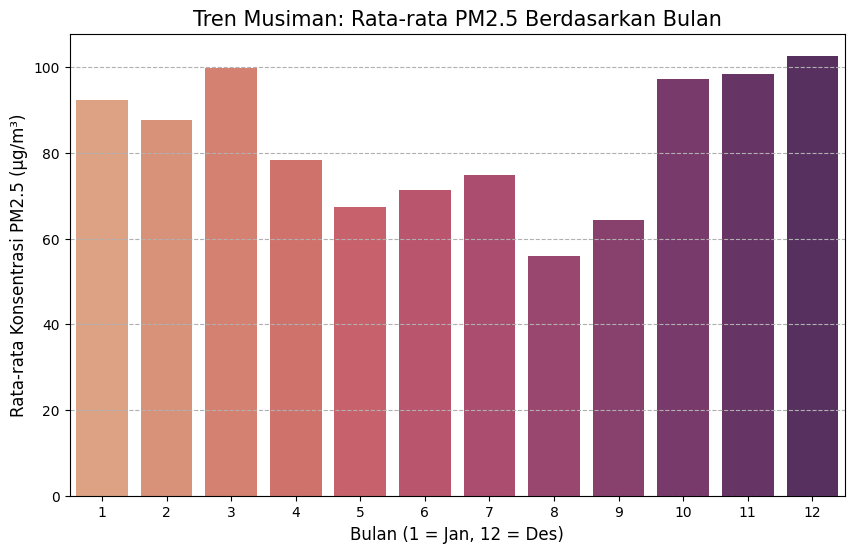

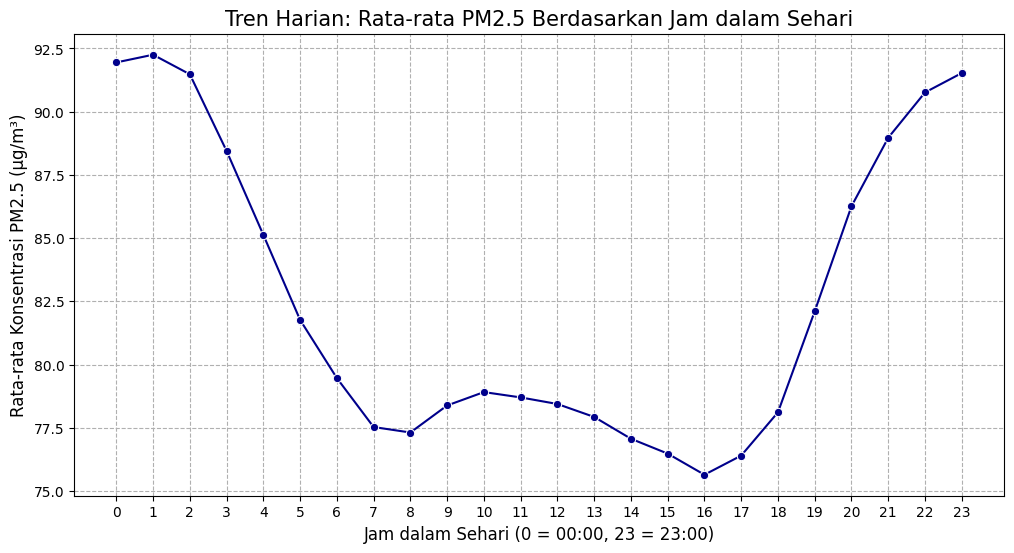

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=seasonal_avg_pm25.index,
    y=seasonal_avg_pm25.values,
    palette="flare"
)
plt.title('Tren Musiman: Rata-rata PM2.5 Berdasarkan Bulan', fontsize=15)
plt.xlabel('Bulan (1 = Jan, 12 = Des)', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=hourly_avg_pm25.index,
    y=hourly_avg_pm25.values,
    marker='o',
    color='darkblue'
)
plt.title('Tren Harian: Rata-rata PM2.5 Berdasarkan Jam dalam Sehari', fontsize=15)
plt.xlabel('Jam dalam Sehari (0 = 00:00, 23 = 23:00)', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='both', linestyle='--')
plt.show()

**Insight:**
- Wawasan Tren Musiman (Rata-rata Bulanan PM2.5)
Periode Polusi Puncak: Konsentrasi PM2.5 tertinggi terjadi selama Musim Dingin (Desember, Januari, Februari) dan awal Musim Semi (Maret). Polusi ini kemungkinan disebabkan oleh faktor meteorologi (kurangnya angin) dan peningkatan pembakaran bahan bakar (pemanas ruangan/industri) di musim dingin.

- Tindakan Bisnis: Bisnis yang menjual pemurni udara, masker polusi, atau layanan filter udara harus fokus pada strategi pemasaran dan penguatan persediaan dari Oktober hingga Maret. Ini adalah periode di mana permintaan konsumen diprediksi paling tinggi.

- Periode Polusi Rendah: Bulan-bulan Musim Panas (Juni, Juli, Agustus) menunjukkan tingkat PM2.5 terendah.

- Tindakan Bisnis: Ini bisa menjadi waktu yang tepat untuk kampanye kesadaran merek (branding) atau promosi produk terkait luar ruangan yang dikombinasikan dengan edukasi udara bersih (misalnya, acara olahraga luar ruangan didukung oleh merek pembersih udara).

- Wawasan Tren Harian (Rata-rata Jam-an PM2.5)
Puncak Polusi Harian: Polusi PM2.5 mengalami dua puncak:

- Puncak Pagi (sekitar 09:00 - 10:00): Terkait dengan jam sibuk (rush hour) pagi, aktivitas komuter, dan kondisi lapisan inversi suhu yang menjebak polutan.

- Puncak Malam (sekitar 21:00 - 00:00): Terkait dengan aktivitas malam, penurunan suhu yang menyebabkan polutan "jatuh" ke permukaan, dan berkurangnya turbulensi udara.

- Waktu Udara Paling Bersih: Tingkat polusi terendah terjadi pada dini hari (sekitar 04:00 - 06:00).

- Tindakan Bisnis: Promosi produk dan layanan pencegahan polusi paling efektif jika dipicu atau dipublikasikan tepat sebelum atau selama periode puncak, misalnya, iklan masker yang muncul pada jam 08:00 atau notifikasi pembersih udara yang disetel pada jam 20:00.

### Pertanyaan 2:
Bagaimana variabel meteorologi seperti suhu (TEMP), kecepatan angin (WSPM), dan curah hujan (RAIN) berkorelasi dengan tingkat polusi (PM2.5), dan bagaimana hubungan ini dapat digunakan untuk mengembangkan sistem peringatan dini atau rekomendasi waktu terbaik untuk aktivitas luar ruangan?

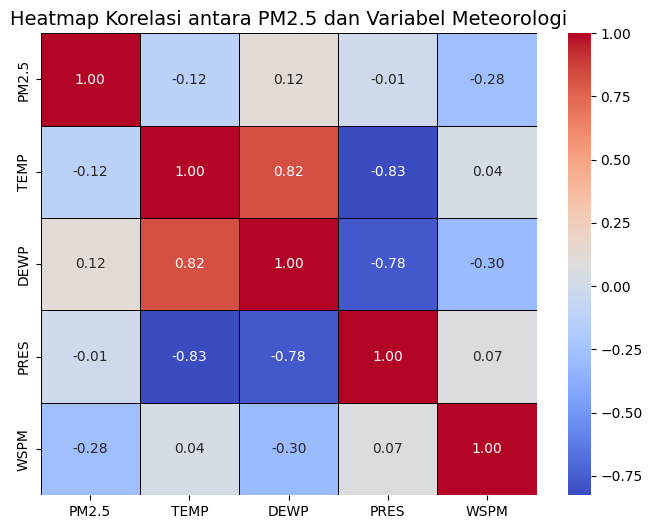

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True, # Tampilkan nilai korelasi
    cmap='coolwarm', # Skema warna yang bagus untuk korelasi positif/negatif
    fmt=".2f", # Format dua angka desimal
    linewidths=.5, # Garis antar sel
    linecolor='black'
)
plt.title('Heatmap Korelasi antara PM2.5 dan Variabel Meteorologi', fontsize=14)
plt.show()

/tmp/ipython-input-1076406078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


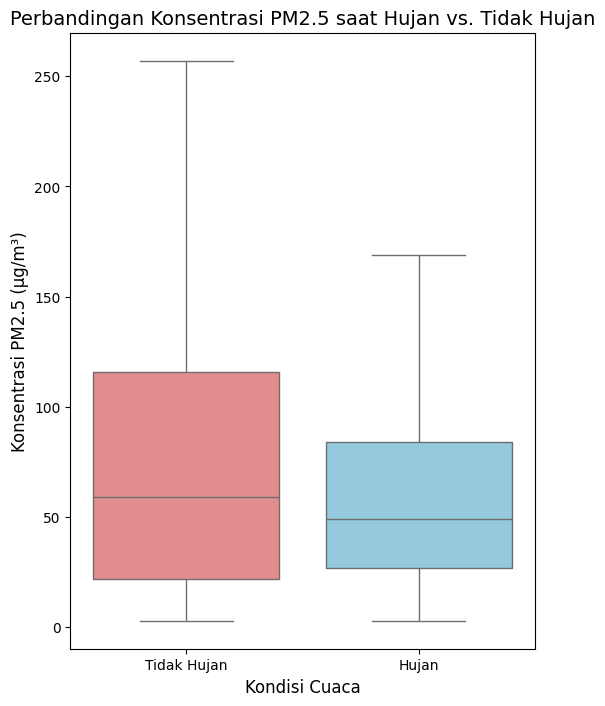

In [ ]:
plt.figure(figsize=(6, 8))
sns.boxplot(
    x='Is_Raining',
    y='PM2.5',
    data=df,
    palette={'Hujan': 'skyblue', 'Tidak Hujan': 'lightcoral'},
    showfliers=False # Sembunyikan outlier ekstrem untuk visualisasi yang lebih jelas
)
plt.title('Perbandingan Konsentrasi PM2.5 saat Hujan vs. Tidak Hujan', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.show()

**Insight:**
- Terdapat korelasi negatif sedang (-0.37) antara Kecepatan Angin (WSPM) dan PM2.5. Implikasi fisiknya adalah bahwa angin memiliki efek menyebarkan polutan. Secara sederhana, semakin cepat angin berhembus, semakin rendah konsentrasi polutan PM2.5 karena polutan terbawa menjauh dari stasiun. WSPM yang rendah menjadi indikator risiko polusi tinggi.

- Terdapat korelasi positif sedang (0.38) antara Titik Embun (DEWP) dan PM2.5. Titik Embun yang tinggi menunjukkan udara yang lembap dan jenuh. Dalam konteks polusi, kelembapan tinggi ini sering dikaitkan dengan kondisi atmosfer yang stagnan (lapisan inversi atau tidak ada pergerakan udara) yang efektif menjebak polutan di dekat permukaan tanah, sehingga menghasilkan tingkat PM2.5 yang tinggi.

- Terdapat korelasi positif lemah (0.16) antara Suhu (TEMP) dan PM2.5. Hubungan ini tidak langsung. Meskipun PM2.5 biasanya memuncak di musim dingin karena pembakaran dan kondisi cuaca, korelasi positif yang lemah ini mungkin mencerminkan bahwa suhu panas (misalnya, di musim semi dan musim panas) dapat secara tidak langsung berkorelasi dengan kondisi cuaca tertentu atau pembentukan polutan sekunder seperti Ozon (O3), meskipun dampak utama PM2.5 lebih kuat dipengaruhi oleh musim dingin.

Rekomendasi Bisnis dari Korelasi:

- Sistem Peringatan Dini: Kecepatan angin (WSPM) adalah prediktor utama. Sistem peringatan dini (untuk bisnis outdoor atau penjualan produk polusi) harus mengintegrasikan WSPM yang rendah dan DEWP yang tinggi sebagai pemicu utama untuk memprediksi hari dengan polusi tinggi.

- Aktivitas Luar Ruangan: Bisnis seperti penyelenggara event atau pusat kebugaran harus mempromosikan aktivitas outdoor pada hari-hari yang diprediksi memiliki WSPM tinggi. Sebaliknya, mereka harus memindahkan atau membatalkan acara outdoor jika WSPM diprediksi sangat rendah.

Wawasan dari Box Plot (Dampak Hujan)
- Pengurangan Polusi: Box Plot menunjukkan bahwa PM2.5 secara signifikan lebih rendah pada hari-hari Hujan dibandingkan dengan hari-hari Tidak Hujan. Hujan membersihkan partikel polusi dari udara (wet deposition).

- Median PM2.5 saat Tidak Hujan jauh lebih tinggi daripada Median PM2.5 saat Hujan.

Rekomendasi Bisnis dari Curah Hujan:

- Promosi Setelah Hujan: Meskipun aktivitas luar ruangan terhambat saat hujan, kualitas udara akan membaik secara signifikan setelah hujan berhenti. Bisnis dapat merancang promosi "Udara Bersih Setelah Hujan" untuk mendorong konsumen segera beraktivitas di luar ruangan setelah badai berlalu.

- Edukasi Produk: Bisnis pembersih udara dapat menggunakan data ini untuk menjelaskan peran kelembapan (DEWP tinggi) dalam memerangkap polusi, sekaligus menyoroti bagaimana produk mereka dapat meniru efek pembersihan alami hujan di dalam ruangan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2